In [2]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile("ishowspeed_quotes.xlsx")

# Print all sheet names
print(excel_file.sheet_names)

['Tweet_1', 'Tweet_2', 'Tweet_3', 'Tweet_4', 'Tweet_5', 'Tweet_6', 'Tweet_7', 'Tweet_8', 'Tweet_9', 'Tweet_10', 'Tweet_11', 'Tweet_12', 'Tweet_13', 'Tweet_14', 'Tweet_15', 'Tweet_16']


In [ ]:
# Manually define content categories
# Load your tweet data
df = pd.read_csv("ishowspeed_tweets.csv")

# Add a new empty column for content type
df["content_type"] = ""

# Display all tweets with their index and text for manual review
for idx, row in df.iterrows():
    print(f"\nTweet #{idx}")
    print(f"Media Type : {row['media_type']}")
    print(f"Text       : {row['text']}")
    
    # User input for a content type label
    content_type = input("Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music): ")
    
    # Store the label
    df.at[idx, "content_type"] = content_type

# Save the updated DataFrame back to CSV
df.to_csv("ishowspeed_tweets.csv", index=False)
print("\n✅ Classification saved to ishowspeed_tweets.csv")


Tweet #0
Media Type : photo
Text       : UCL⚽️ https://t.co/p3kb2t7xUl


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Sports



Tweet #1
Media Type : photo
Text       : Thank You China &amp; Mongolia🇨🇳🇭🇰🇲🇳 https://t.co/pEGTeb2PCR


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Travel, Meme



Tweet #2
Media Type : video
Text       : I opened the wrong door 🚪
@ksi watched the chaos unfold 🤯
Eubank vs Benn — when the game ends, the real battle begins, live from London 🎮🥊

📍Tottenham Hotspur Stadium
🗓️26 April, 2025

Buy PPV on DAZN and SKY
https://t.co/aOsaRxLUjV

@KOFstudio_en https://t.co/Dbv0fJ2QdZ


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Gaming, Advertisement



Tweet #3
Media Type : video
Text       : One Way Out 🕳️ https://t.co/OySSuzwHyY


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Travel, Meme



Tweet #4
Media Type : video
Text       : climbing  the LOVE LADDER🇨🇳🗻 https://t.co/OVqH7WRSCf


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Travel



Tweet #5
Media Type : video
Text       : i learned kung fu🇨🇳🥋 https://t.co/j2Zg4IFKK6


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Travel, Meme



Tweet #6
Media Type : video
Text       : Every Shoe for Every Athlete 

@DICKS https://t.co/19v1G2yeo8


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Sports, Advertisement



Tweet #7
Media Type : video
Text       : CHINA HERE I COME!!!! 🇨🇳🇲🇳🇭🇰 

LIVE 2:00PM CST 3/24 https://t.co/PEfOJtx1rR


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Travel



Tweet #8
Media Type : photo
Text       : 2 goals🔥 https://t.co/DlkBLKupAA


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Sports



Tweet #9
Media Type : photo
Text       : https://t.co/fXGjVHzwSl


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Meme



Tweet #10
Media Type : video
Text       : no more WWE💔 https://t.co/iOb9xDGKGs


Enter content type (e.g., Gaming, Meme, Viral, Sports, Fan, Music):  Sports, Meme



Tweet #11
Media Type : photo
Text       : Im coming back to Argentina🇦🇷 https://t.co/juIV6bLcLR


In [8]:
df = pd.read_csv("ishowspeed_tweets.csv")

# Split content_type by comma and explode into multiple rows
df["content_type"] = df["content_type"].str.split(r",\s*")  # split and remove extra spaces
df = df.explode("content_type")

# Strip whitespace from labels
df["content_type"] = df["content_type"].str.strip()

# Recalculate average engagement per content type
metrics = ["views_count", "like_count", "reply_count", "retweet_count", "quote_count"]
engagement_summary = df.groupby("content_type")[metrics].mean().sort_values("like_count", ascending=False)

print(engagement_summary)

                views_count     like_count  reply_count  retweet_count  \
content_type                                                             
Meme           3.055804e+07  555535.000000      5117.40   27847.800000   
Sports         1.280036e+07  313619.500000      2335.25   14985.000000   
Travel         2.403266e+07  252122.000000      2698.50   11033.125000   
Gaming         4.108550e+06   95670.666667       752.00    2477.333333   
Advertisement  3.231988e+06   60452.500000       629.00    2250.000000   

               quote_count  
content_type                
Meme           2887.600000  
Sports         1234.500000  
Travel         2309.125000  
Gaming          186.666667  
Advertisement   257.000000  


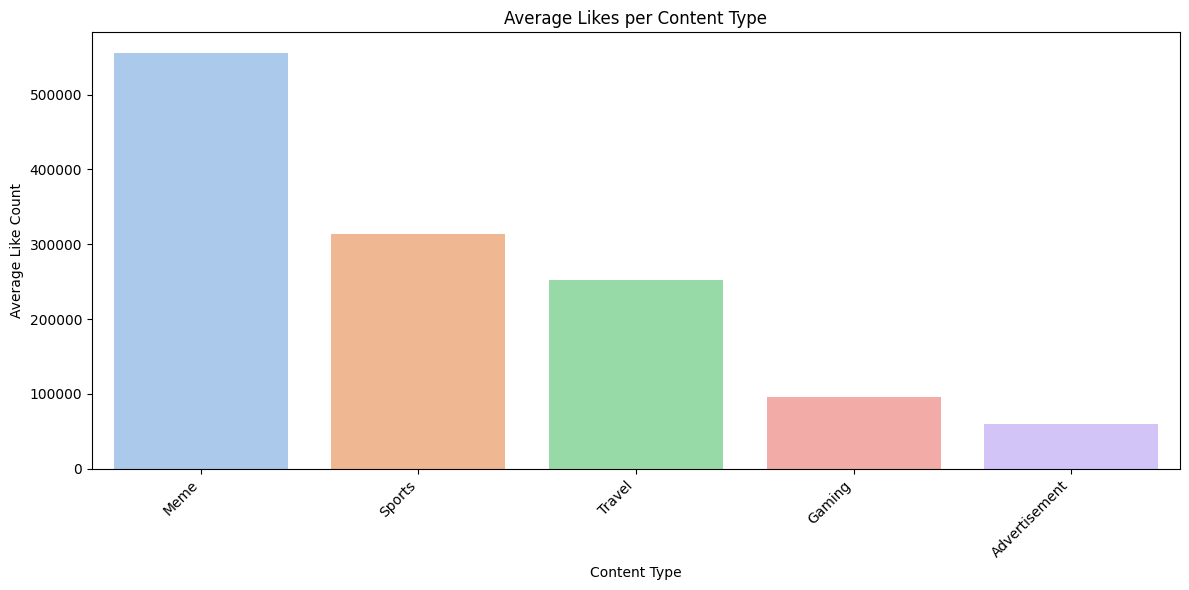

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
engagement_summary = engagement_summary.reset_index()

# Plot average likes
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_summary, x="content_type", hue="content_type", y="like_count", palette="pastel", legend=False)

plt.title("Average Likes per Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Like Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

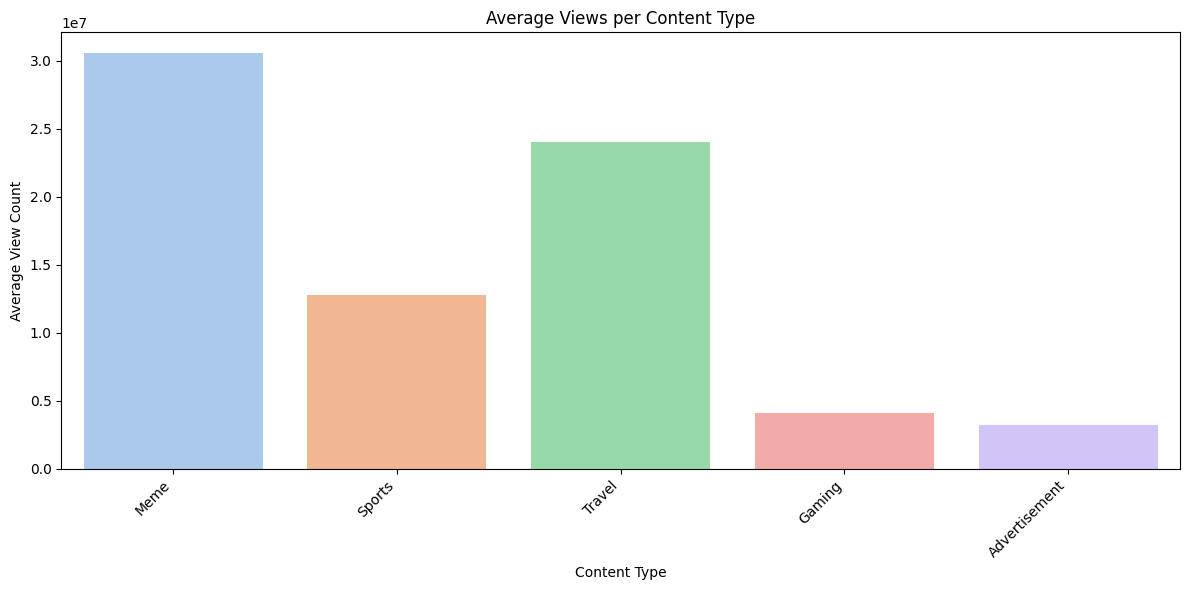

In [15]:
# Plot average views
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_summary, x="content_type", hue="content_type", y="views_count", palette="pastel", legend=False)

plt.title("Average Views per Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average View Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

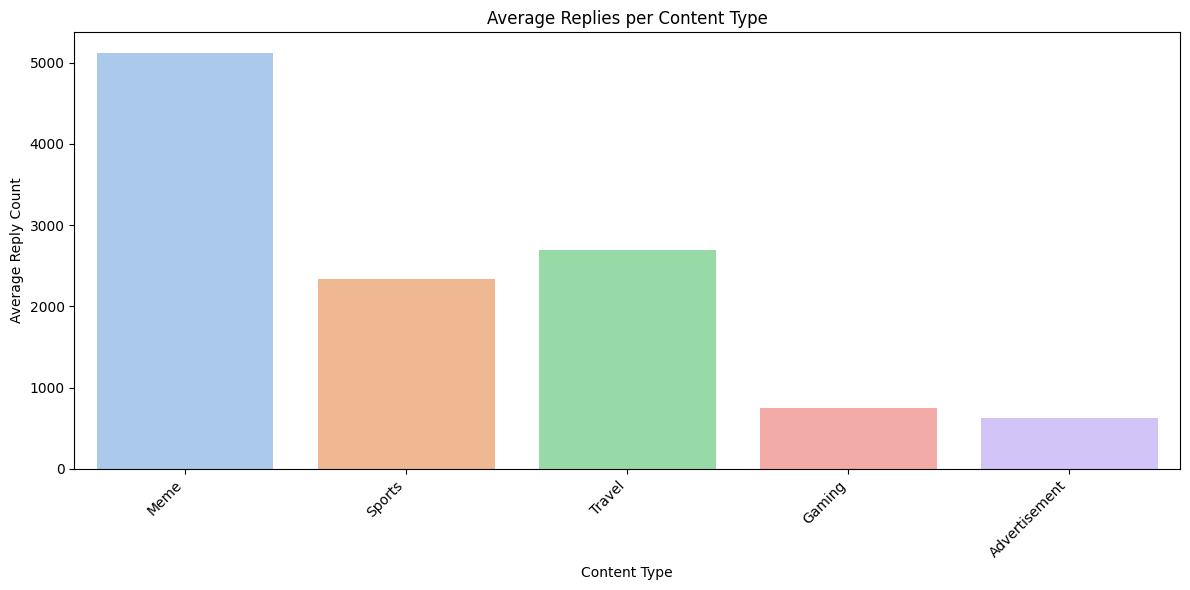

In [16]:
# Plot average replies
plt.figure(figsize=(12, 6))
sns.barplot(data=engagement_summary, x="content_type", hue="content_type", y="reply_count", palette="pastel", legend=False)

plt.title("Average Replies per Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Reply Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Meme has the highest average in likes count, views count, and replies
# Shows how IShowSpeed maintains his relevancy, by showcasing his sense of humour
# If a travel or sports tweet has some humour/meme aspect, its engagements are higher
# Travel has the second highest average views count as his followers are anticipating on where he goes next, the pictures/videos of the country he has travelled or will travel to
# Sports has the second highest likes count as one of the thing IShowSpeed is known for is his passion for football. He has meet a number of legends in the football world
# Gaming and Advertisement both scored lowest in all 3 metrics average. Likely because his followers like his sports and travel content more and his content has been focusing on those 2 categories lately

In [18]:
# Analyse language variations (Group tweets by language)
# Load all sheets
all_sheets = pd.read_excel("ishowspeed_quotes.xlsx", sheet_name=None)

# Combine all sheets into a single DataFrame
combined_quotes = pd.concat(all_sheets.values(), ignore_index=True)

# Check if 'language' column exists
if "language" in combined_quotes.columns:
    # Group by language and count quotes
    lang_counts = combined_quotes["language"].value_counts()

    print("Quote count by language:")
    print(lang_counts)
else:
    print("No 'language' column found in the quote sheets.")

Quote count by language:
language
en     172
es      41
zxx     21
pt      19
fr      14
art     12
qst      7
pl       3
tr       2
qme      2
et       2
ar       1
zh       1
eu       1
tl       1
is       1
in       1
ja       1
ca       1
it       1
und      1
ht       1
Name: count, dtype: int64


In [28]:
# Texts with language code that should considered to be removed
# zxx- No linguistic content, used for non-verbal tweets (e.g., links, images only) and there is no text to analyze
# art- Artificial language, rare and hard to analyze meaningfully
# qst- Questionable (unknown type), low confidence classification and often unreliable
# qme- Possibly Meitei or other obscure, rare and not typically used in sentiment tools
# und- Undetermined, language couldn’t be detected

In [26]:
import pandas as pd
from googletrans import Translator
import html

# Initialize the translator
translator = Translator()

# Define unwanted languages
exclude_langs = {"zxx", "art", "qst", "qme", "und"}

# Store cleaned sheets
cleaned_quotes = {}

# Function to translate text
def translate_if_needed(text, lang):
    try:
        if lang != 'en':
            return translator.translate(text, dest='en').text
        return text  # Already in English
    except:
        return text  # If translation fails, return original

# Process each sheet
for sheet_name, df in all_sheets.items():
    # Drop rows with excluded languages or empty text
    df = df[~df["language"].isin(exclude_langs)]
    df = df.dropna(subset=["text"]).copy()

    # Clean HTML entites
    df['text'] = df['text'].apply(lambda x: html.unescape(x) if pd.notnull(x) else x)

    # Translate text column
    df["translated_text"] = df.apply(lambda row: translate_if_needed(row["text"], row["language"]), axis=1)

    # Save cleaned version
    cleaned_quotes[sheet_name] = df

# Save all to the "ishowspeed_quotes.xlsx" Excel file
with pd.ExcelWriter("ishowspeed_quotes.xlsx", engine="openpyxl") as writer:
    for sheet_name, df in cleaned_quotes.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Cleaned and translated data saved to ishowspeed_quotes.xlsx")

Cleaned and translated data saved to ishowspeed_quotes.xlsx


In [27]:
quotes = pd.read_excel("ishowspeed_quotes.xlsx", sheet_name=None)  # Replace with your file name

# Print the first two sheets (test)
print("=== Sheet: Tweet_1 ===")
print(quotes["Tweet_1"])  

print("\n=== Sheet: Tweet_2 ===")
print(quotes["Tweet_2"])

=== Sheet: Tweet_1 ===
                        created_at  \
0   Mon Dec 30 09:57:55 +0000 2024   
1   Mon Dec 30 06:32:11 +0000 2024   
2   Mon Dec 30 06:33:40 +0000 2024   
3   Fri Jan 10 18:31:29 +0000 2025   
4   Mon Dec 30 06:52:04 +0000 2024   
5   Tue Dec 31 01:14:12 +0000 2024   
6   Mon Dec 30 15:01:16 +0000 2024   
7   Sat Jan 04 19:37:18 +0000 2025   
8   Mon Dec 30 09:52:35 +0000 2024   
9   Mon Dec 30 09:54:08 +0000 2024   
10  Mon Dec 30 11:04:33 +0000 2024   
11  Mon Dec 30 14:03:47 +0000 2024   
12  Wed Jan 01 05:37:14 +0000 2025   

                                                 text language  views_count  \
0   Speed and Kai after seeing their chats spammin...       en          989   
1   Even after the game they was still locked in 😭...       en          184   
2                           All it took just 57 hrs 💀       en          203   
3                                            Carrillo       es            2   
4                                     What happen

In [30]:
from textblob import TextBlob

# To store average sentiment for each tweet (sheet)
avg_sentiments = []

# Loop through each sheet (quotes for each tweet)
for i, (sheet_name, df_quotes) in enumerate(quotes.items()):

    # Compute sentiment polarity for each quote
    df_quotes["sentiment"] = df_quotes["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Compute average sentiment for this sheet/tweet
    avg_sentiments.append(df_quotes["sentiment"].mean())

# Load the original tweets CSV
tweets_df = pd.read_csv("ishowspeed_tweets.csv")

# Add the average sentiment from quotes as a new column
tweets_df["avg_quote_sentiment"] = avg_sentiments

# Save the updated CSV
tweets_df.to_csv("ishowspeed_tweets.csv", index=False)

In [31]:
print(tweets_df[["text", "avg_quote_sentiment"]])

                                                 text  avg_quote_sentiment
0                       UCL⚽️ https://t.co/p3kb2t7xUl             0.015385
1   Thank You China &amp; Mongolia🇨🇳🇭🇰🇲🇳 https://t...             0.144737
2   I opened the wrong door 🚪\n@ksi watched the ch...            -0.017344
3              One Way Out 🕳️ https://t.co/OySSuzwHyY             0.129167
4   climbing  the LOVE LADDER🇨🇳🗻 https://t.co/OVqH...             0.005988
5        i learned kung fu🇨🇳🥋 https://t.co/j2Zg4IFKK6             0.076471
6   Every Shoe for Every Athlete \n\n@DICKS https:...             0.000000
7   CHINA HERE I COME!!!! 🇨🇳🇲🇳🇭🇰 \n\nLIVE 2:00PM C...            -0.017824
8                    2 goals🔥 https://t.co/DlkBLKupAA            -0.111765
9                             https://t.co/fXGjVHzwSl             0.122055
10               no more WWE💔 https://t.co/iOb9xDGKGs             0.095313
11  Im coming back to Argentina🇦🇷 https://t.co/juI...             0.003571
12  NOW LIVE IN ARGENTINA

In [32]:
# Label sentiments
def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

tweets_df["sentiment_label"] = tweets_df["avg_quote_sentiment"].apply(label_sentiment)
print(tweets_df[["text", "avg_quote_sentiment", "sentiment_label"]])

                                                 text  avg_quote_sentiment  \
0                       UCL⚽️ https://t.co/p3kb2t7xUl             0.015385   
1   Thank You China &amp; Mongolia🇨🇳🇭🇰🇲🇳 https://t...             0.144737   
2   I opened the wrong door 🚪\n@ksi watched the ch...            -0.017344   
3              One Way Out 🕳️ https://t.co/OySSuzwHyY             0.129167   
4   climbing  the LOVE LADDER🇨🇳🗻 https://t.co/OVqH...             0.005988   
5        i learned kung fu🇨🇳🥋 https://t.co/j2Zg4IFKK6             0.076471   
6   Every Shoe for Every Athlete \n\n@DICKS https:...             0.000000   
7   CHINA HERE I COME!!!! 🇨🇳🇲🇳🇭🇰 \n\nLIVE 2:00PM C...            -0.017824   
8                    2 goals🔥 https://t.co/DlkBLKupAA            -0.111765   
9                             https://t.co/fXGjVHzwSl             0.122055   
10               no more WWE💔 https://t.co/iOb9xDGKGs             0.095313   
11  Im coming back to Argentina🇦🇷 https://t.co/juI...           

In [33]:
# Save the updated CSV
tweets_df.to_csv("ishowspeed_tweets.csv", index=False)

In [34]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)        # remove punctuation and numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

topics_per_sheet = {}

for sheet_name, df in quotes.items():
    # Preprocess each text
    texts = df["translated_text"].dropna().apply(preprocess).tolist()
    
    if not texts or len(texts) < 3:
        topics_per_sheet[sheet_name] = ["Insufficient data"]
        continue

    # Vectorize
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    doc_term_matrix = vectorizer.fit_transform(texts)

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=1, random_state=42)
    lda.fit(doc_term_matrix)

    # Get top words for the topic
    words = vectorizer.get_feature_names_out()
    topic_words = lda.components_[0].argsort()[-10:][::-1]
    keywords = [words[i] for i in topic_words]

    topics_per_sheet[sheet_name] = keywords

# Display the themes
for sheet, keywords in topics_per_sheet.items():
    print(f"🧵 {sheet} Topics: {', '.join(keywords)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


🧵 Tweet_1 Topics: kai
🧵 Tweet_2 Topics: china, one, mongolia, stop, war, world, speed, need, going, foam
🧵 Tweet_3 Topics: watch, promo, love, well, snk, like, level, ksi, help, gonna
🧵 Tweet_4 Topics: one, nigga, speed, probably, internet, could, ass
🧵 Tweet_5 Topics: top, make, life, fortnite
🧵 Tweet_6 Topics: speed, one, like, life, ishowspeed, anything
🧵 Tweet_7 Topics: nigga, name, bro
🧵 Tweet_8 Topics: speed, nigga, china, shit, much, largest, guy, funny
🧵 Tweet_9 Topics: trophy, kane, harry, speed, goals
🧵 Tweet_10 Topics: isagi, likes, million, royalrumble, like, got
🧵 Tweet_11 Topics: wwe, took, speed, shit, like, ishowspeedsui
🧵 Tweet_12 Topics: cock, want, world, country, know, best, sucking
🧵 Tweet_13 Topics: speed, shirt, bombonera, argentina
🧵 Tweet_14 Topics: argentina, columbia, black, uruguay, shit, someone, speed, one, gay, going
🧵 Tweet_15 Topics: game, content
🧵 Tweet_16 Topics: kai


In [35]:
# Match order of sheets with rows in CSV
tweets_df["quote_topics"] = list(topics_per_sheet.values())
tweets_df.to_csv("ishowspeed_tweets.csv", index=False)

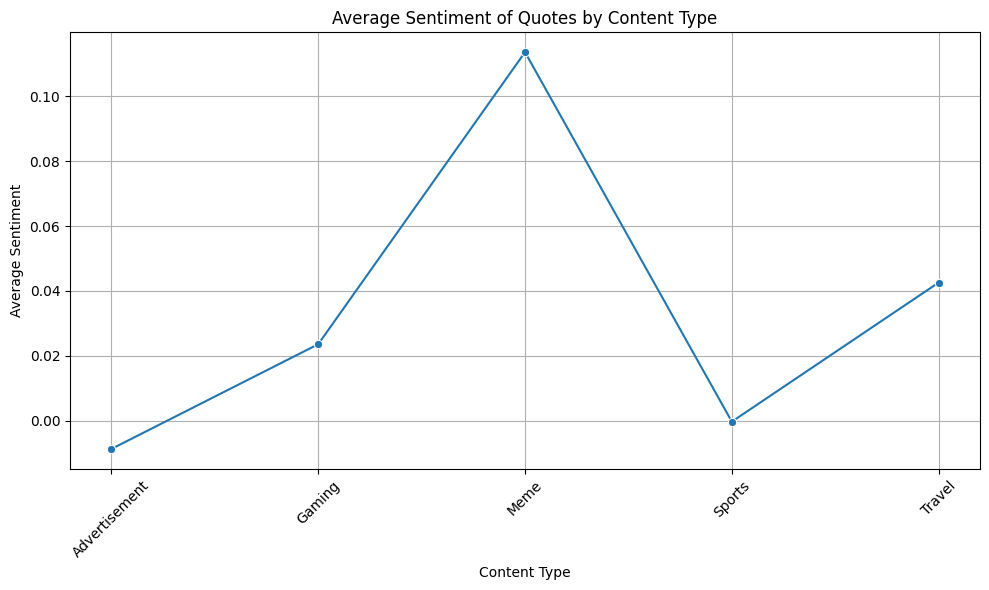

In [36]:
# Explode content_type if multiple labels per tweet (e.g., "Meme, Gaming")
tweets_df["content_type"] = tweets_df["content_type"].str.split(r",\s*")
tweets_df = tweets_df.explode("content_type")

# Group and plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=tweets_df.groupby("content_type")["avg_quote_sentiment"].mean().reset_index(),
    x="content_type",
    y="avg_quote_sentiment",
    marker="o",
    sort=False
)
plt.title("Average Sentiment of Quotes by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

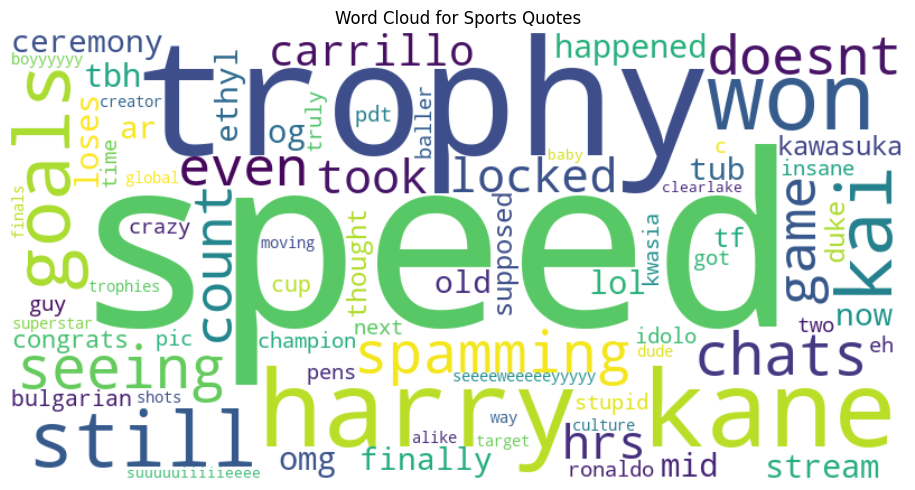

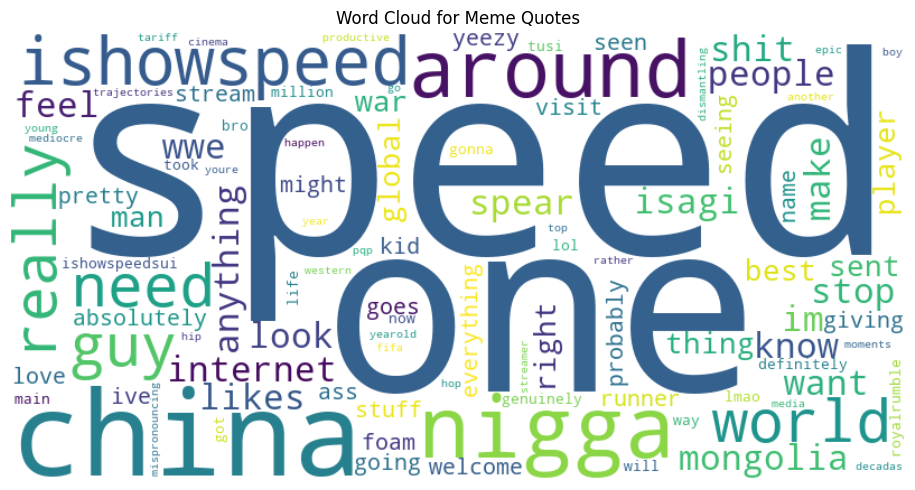

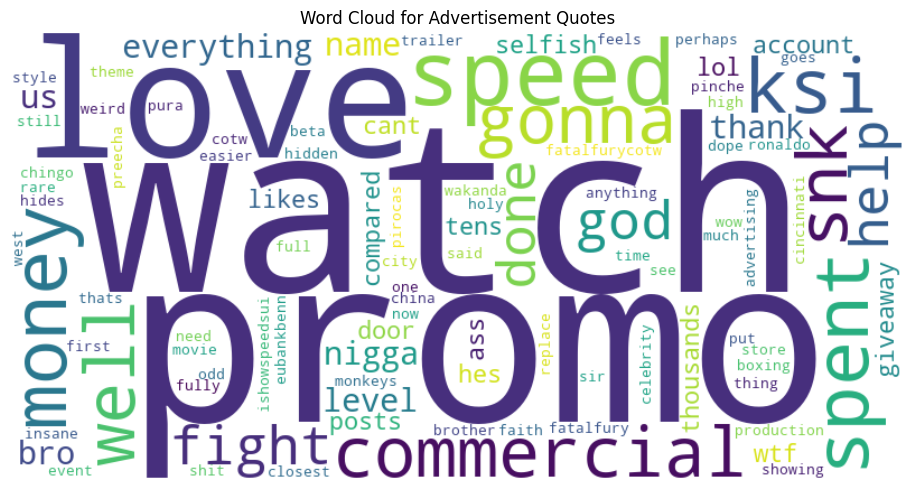

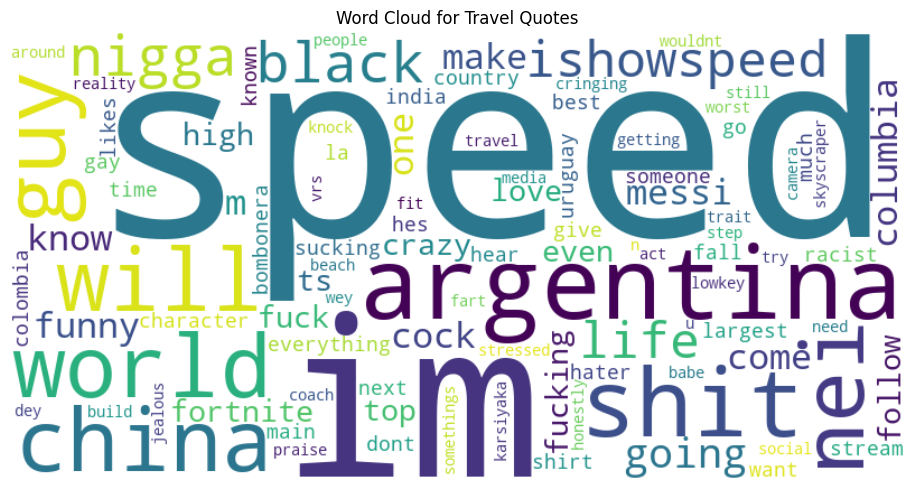

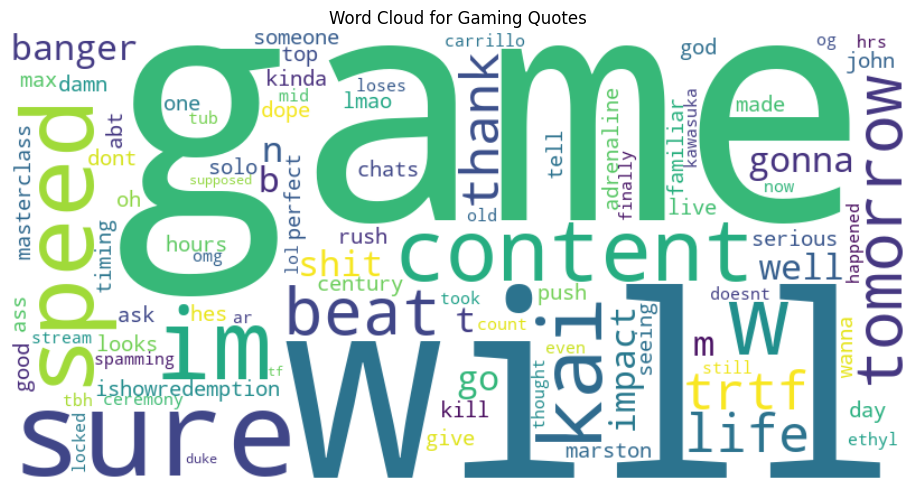

In [38]:
# Can be removed if uneccessary
from wordcloud import WordCloud

# Combine into one DataFrame with the original sheet names
all_quotes = []
for sheet_name, df in quotes.items():
    df = df.copy()
    df["sheet"] = sheet_name
    all_quotes.append(df)

combined_df = pd.concat(all_quotes, ignore_index=True)

# Assume you merged tweet content_type into the quotes
sheet_to_type = dict(zip(tweets_df.index.map(lambda i: f"Tweet_{i+1}"), tweets_df["content_type"]))

combined_df["content_type"] = combined_df["sheet"].map(sheet_to_type)
combined_df["content_type"] = combined_df["content_type"].str.split(r",\s*")
combined_df = combined_df.explode("content_type")

# Clean and combine text per content type
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

for content in combined_df["content_type"].dropna().unique():
    subset = combined_df[combined_df["content_type"] == content]
    text = " ".join(subset["translated_text"].dropna().apply(clean_text))

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=100
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {content} Quotes")
    plt.tight_layout()
    plt.show()